In [2]:
# importing TensorFlow
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Splitting the dataset into testing and training parts
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


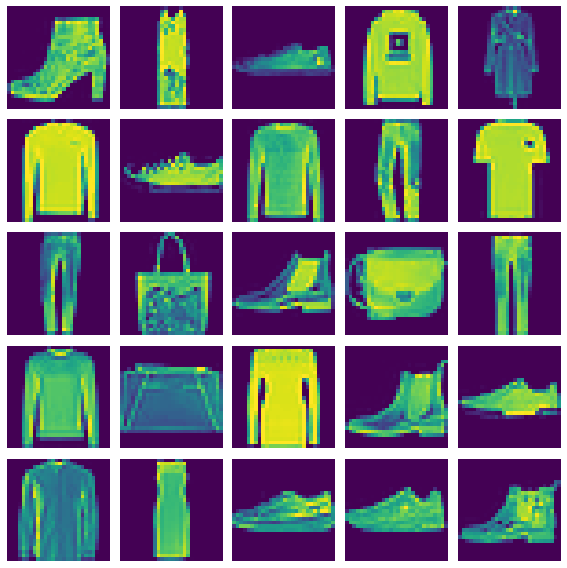

In [11]:
# importing the modules
import matplotlib.pyplot as plt
import numpy as np

#ceating columns and rows 
columns = 5
rows = 5

# fixing the size of plot
fig = plt.figure(figsize=(8, 8))

# using for loop to iterate
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28, 28])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

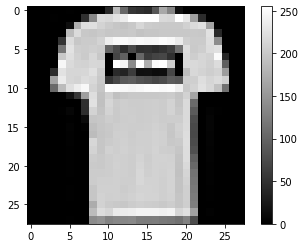

In [13]:
# plotting one image frrom the data
plt.figure()
plt.imshow(train_images[1], cmap='gray')

# printing the color bar
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# divide by 255 to range from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
# initializing the model
model = tf.keras.Sequential([
    # flattening the layers to have an image size of 28x28
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Adding dense layer with 128 nodes
    tf.keras.layers.Dense(128, activation='relu'),

    # adding output  layer with 10 nodes
    tf.keras.layers.Dense(10)
])

In [16]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [19]:
# finding the test accuracy
test_acc = model.evaluate(test_images,  test_labels)

# printing the accuracy
print('Test accuracy:', test_acc[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8796

Test accuracy: 0.8795999884605408


In [21]:
# loading both trained and test data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [22]:
# printing the shape 
print(train_images.shape)

(50000, 32, 32, 3)


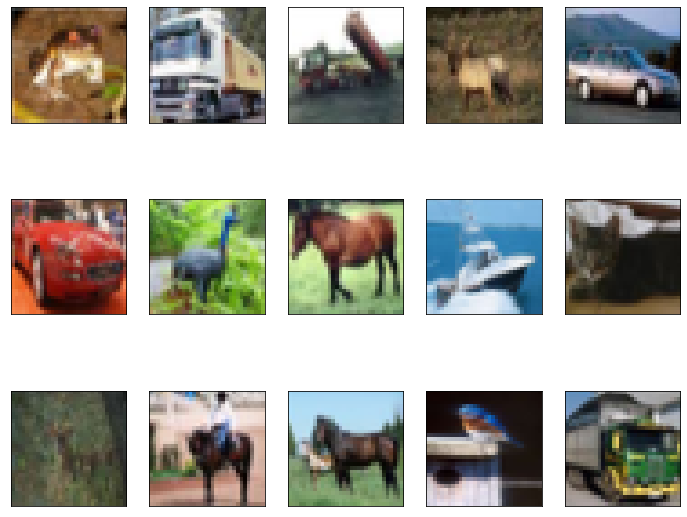

In [27]:
# figure size
plt.figure(figsize=(12,10))

# looping for first 15 images
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [28]:
# Normalize 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [30]:
# initializing the model
model = tf.keras.models.Sequential()

# applying filter of size 3 by 3 and total of 32 filters
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

In [31]:
# adding pooling method
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


In [33]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [34]:
# initializing the model
model1 = tf.keras.models.Sequential()

# applying filter of size 3 by 3 and total of 32 filters
model1.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# adding pooling method
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [43]:
# building model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# flattening the input matrix
model.add(tf.keras.layers.Flatten())

# applying hidden layer with 32 nodes
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))


# output layer with 10 nodes
model.add(tf.keras. layers.Dense(10))


In [44]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fitting model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5147 - accuracy: 0.4487
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1165 - accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9655 - accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8742 - accuracy: 0.6938
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7983 - accuracy: 0.7211
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7318 - accuracy: 0.7434
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6739 - accuracy: 0.7636
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6185 - accuracy: 0.7836
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5678 - accuracy: 0.8029
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [45]:

# finding the test accuracy
test_acc = model.evaluate(test_images,  test_labels)

# printing the accuracy
print('Test accuracy:', test_acc[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.0784 - accuracy: 0.6710
Test accuracy: 0.6710000038146973
